# 81.75 - Fundamentos del desarrollo de software y análisis de datos en Python
## Instituto Tecnologico de Buenos Aires
\\
# Análisis Exploratorio de Datos (EDA) - Medallas Olímpicas
### Pedro Hernán García - [pegarcia@itba.edu.ar](mailto:pegarcia@itba.edu.ar)
### Maria Cristina Haug - [mhaug@itba.edu.ar](mailto:mhaug@itba.edu.ar)
\\
### Fecha de entrega: 08/12/2023
___

# 1. Introducción y Objetivo:

El interés de analizar el medallero olímpico   se centra en lograr un análisis geográfico de acuerdo al tipo de deportes participantes (verano e invierno), y evaluar el posicionanmiento de los países a partir del total de medallas conseguidas.

Se entiende que detrás de los resultados que obtiene un equipo de una determinada nacionalidad se encuentra atravesado por factores socioeconómicos y de acceso de recursos

Proponemos como objetivos de este trabajo la identificación de patrones geograficos, para ver si existen disparidades regionales en la distribución de medallas y si algunos continentes o regiones tienen más éxito que otros; evaluar la equidad en el rendimiento y los resultados de verano e invierno, para ver si se mantiene constante o varia; y finalmente comparar diferentes metodos de ponderación de medallas, para ver si encontramos variaciones en las posiciones dependiendo de como se tomen los valores de cada medalla.

___

# 2. Configuración y Carga de Datos:

Para comenzar, vamos a cargar las liberias y conectar a drive:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Ruta al archivo CSV en Google Drive
file_path = "/content/drive/MyDrive/81.75 - Fundamentos del desarrollo de software y análisis de datos en Python/TP Final/data.csv"

# Cargar el archivo CSV en un DataFrame de Pandas
df = pd.read_csv(file_path, delimiter=",")

___

# 3. Exploración Inicial del Conjunto de Datos:

Realizaremos un vistazo rapido de los datos para saber con que vamos a trabajar:

In [3]:
# Mostrar las primeras filas del conjunto de datos
df.head()

,Team(IOC Code),summer_rank,s_gold,s_silver,s_bronze,summer_total,winter_rank,w_gold,w_silver,w_bronze,winter_total,overall_rank,total_gold,total_silver,total_bronze,total_medals
0,Afghanistan (AFG),14,0,0,2,2,0,0,0,0,0,14,0,0,2,2
1,Algeria (ALG),13,5,4,8,17,3,0,0,0,0,16,5,4,8,17
2,Argentina (ARG),24,21,25,28,74,19,0,0,0,0,43,21,25,28,74
3,Armenia (ARM),6,2,6,6,14,7,0,0,0,0,13,2,6,6,14
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Podemos ver que la primer columna corresponde al pais y a un codigo IOC (*International Olympic Committee*) para identificarlo, mientras que el resto corresponden al numero de medallas segun el tipo y si corresponde a juegos de verano o de invierno.

In [4]:
# Información sobre los tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Team(IOC Code)  152 non-null    object
 1   summer_rank     152 non-null    int64 
 2   s_gold          152 non-null    object
 3   s_silver        152 non-null    int64 
 4   s_bronze        152 non-null    int64 
 5   summer_total    152 non-null    object
 6   winter_rank     152 non-null    int64 
 7   w_gold          152 non-null    int64 
 8   w_silver        152 non-null    int64 
 9   w_bronze        152 non-null    int64 
 10  winter_total    152 non-null    int64 
 11  overall_rank    152 non-null    int64 
 12  total_gold      152 non-null    object
 13  total_silver    152 non-null    int64 
 14  total_bronze    152 non-null    int64 
 15  total_medals    152 non-null    object
dtypes: int64(11), object(5)
memory usage: 19.1+ KB


Nos encontramso con nuestro primer problema, ya que los datos presentan tipos erroneos. Esto lo vamos a corregir más adelante.

In [5]:
# Imprimimos las estadísticas descriptivas de las variables numéricas
print(df.describe())

       summer_rank    s_silver    s_bronze  winter_rank      w_gold  \
count   152.000000  152.000000  152.000000   152.000000  152.000000   
mean     13.953947   33.421053   36.098684     6.901316    6.986842   
std       7.263570   83.156640   80.130585     7.632937   20.570018   
min       0.000000    0.000000    0.000000     0.000000    0.000000   
25%       9.000000    1.000000    1.000000     0.000000    0.000000   
50%      14.000000    4.000000    6.000000     4.500000    0.000000   
75%      18.250000   27.750000   29.500000    10.250000    1.000000   
max      28.000000  795.000000  706.000000    23.000000  132.000000   

         w_silver    w_bronze  winter_total  overall_rank  total_silver  \
count  152.000000  152.000000    152.000000    152.000000    152.000000   
mean     6.967105    6.907895     20.861842     20.855263     40.388158   
std     20.013710   18.638192     58.743358     13.579010     97.470597   
min      0.000000    0.000000      0.000000      1.000000   

___

# 4. Limpieza de Datos:

Como mencionamos anteriormente, realizaremos una limpieza de los datos para poder trabajar con ellos. Para ellos, vamos a eliminar comas de las columnas que podrían contenerlas y convertir la primera columna a `str` y el resto a `int64`.

In [7]:
# Eliminar comas de las columnas que podrían contenerlas
df['s_gold'] = df['s_gold'].str.replace(',', '')
df['summer_total'] = df['summer_total'].str.replace(',', '')
df['total_gold'] = df['total_gold'].str.replace(',', '')
df['total_medals'] = df['total_medals'].str.replace(',', '')

# Convertir la primera columna a string y el resto a int64
df['Team(IOC Code)'] = df['Team(IOC Code)'].astype(str)
df.iloc[:, 1:] = df.iloc[:, 1:].astype('int64')

# Verificar los cambios
print(df.dtypes)

Team(IOC Code)    object
summer_rank        int64
s_gold             int64
s_silver           int64
s_bronze           int64
summer_total       int64
winter_rank        int64
w_gold             int64
w_silver           int64
w_bronze           int64
winter_total       int64
overall_rank       int64
total_gold         int64
total_silver       int64
total_bronze       int64
total_medals       int64
dtype: object


<ipython-input-7-94a7092ec092>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype('int64')


___

# 5. Análisis Exploratorio de Datos:

Como bien propusimos al principio de este trabajo, vamos a hacer un analisis de 3 ejes:
 * Análisis Geográfico
 * Equidad de medallas de juegos de verano vs invierno
 * Comparación de pesos ponderados de medallas

## Análisis Geográfico

Vamos a presentar en un mapa geografico, un mapa de calor, que nos muestre la concentración de medallas segun cada pais:

In [8]:
# Obtén todos los valores únicos de una columna, por ejemplo, 'Team(IOC Code)'
valores_unicos = df['Team(IOC Code)'].unique

# Imprime los valores únicos
valores_unicos

<bound method Series.unique of 0                                  Afghanistan (AFG)
1                                      Algeria (ALG)
2                                    Argentina (ARG)
3                                      Armenia (ARM)
4                            Australasia (ANZ) [ANZ]
                           ...                      
147                               Zambia (ZAM) [ZAM]
148                             Zimbabwe (ZIM) [ZIM]
149         Independent Olympic Athletes (IOA) [IOA]
150     Independent Olympic Participants (IOP) [IOP]
151                           Mixed team (ZZX) [ZZX]
Name: Team(IOC Code), Length: 152, dtype: object>

In [10]:
# Limpia y organiza los nombres de los países
df['Country'] = df['Team(IOC Code)'].str.extract(r'\((\w{3})\)')
df['Country'] = df['Team(IOC Code)'].str.extract(r'\((\w{3})\)')
df['Country'] = df['Team(IOC Code)'].str.extract(r'\((\w{3})\)')

# Carga el mundo shapefile para dibujar el mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Fusiona el DataFrame con el shapefile
world = world.merge(df, how='left', left_on='iso_a3', right_on='Country')

<ipython-input-10-08cd0dfc8c5a>:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


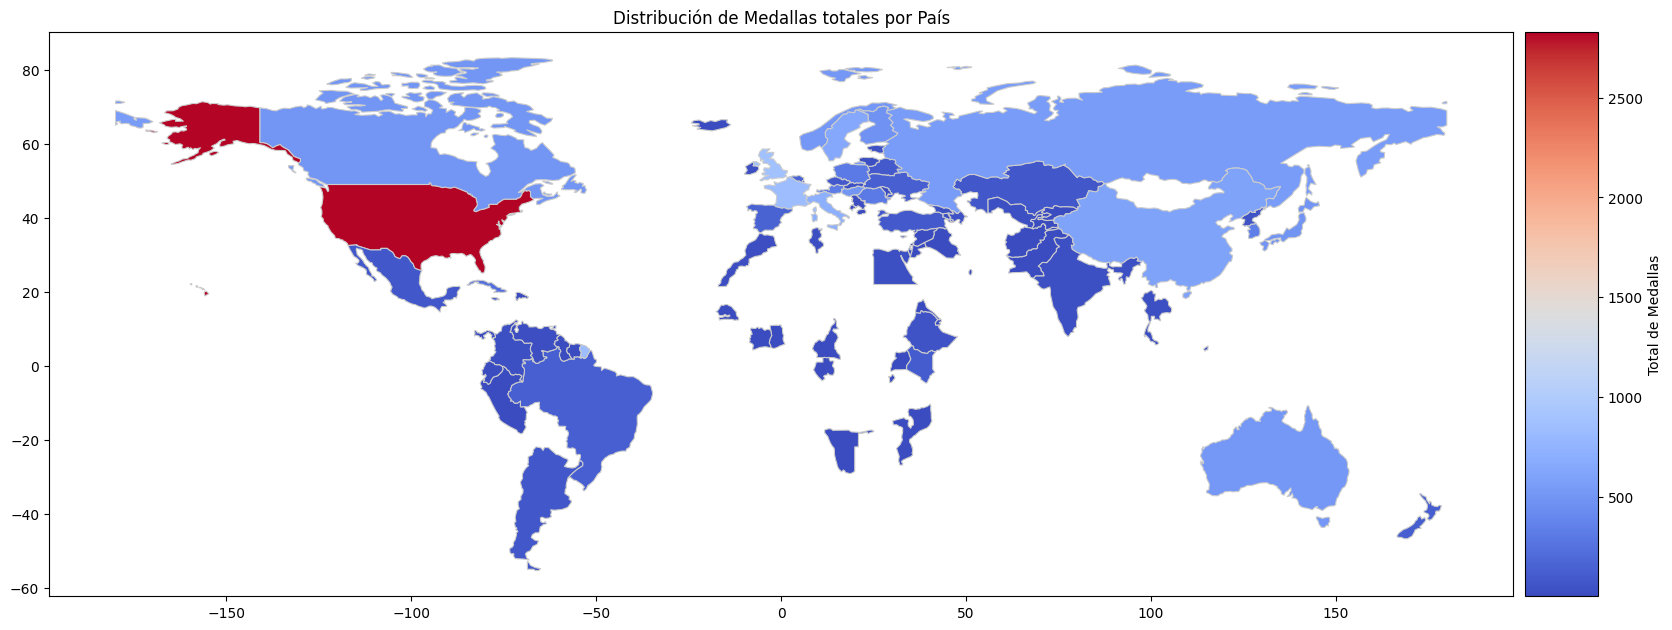

In [11]:
# Visualización geográfica
fig, ax = plt.subplots(figsize=(20, 18))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='total_medals', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Total de Medallas"})
ax.set_title('Distribución de Medallas totales por País')

plt.show()

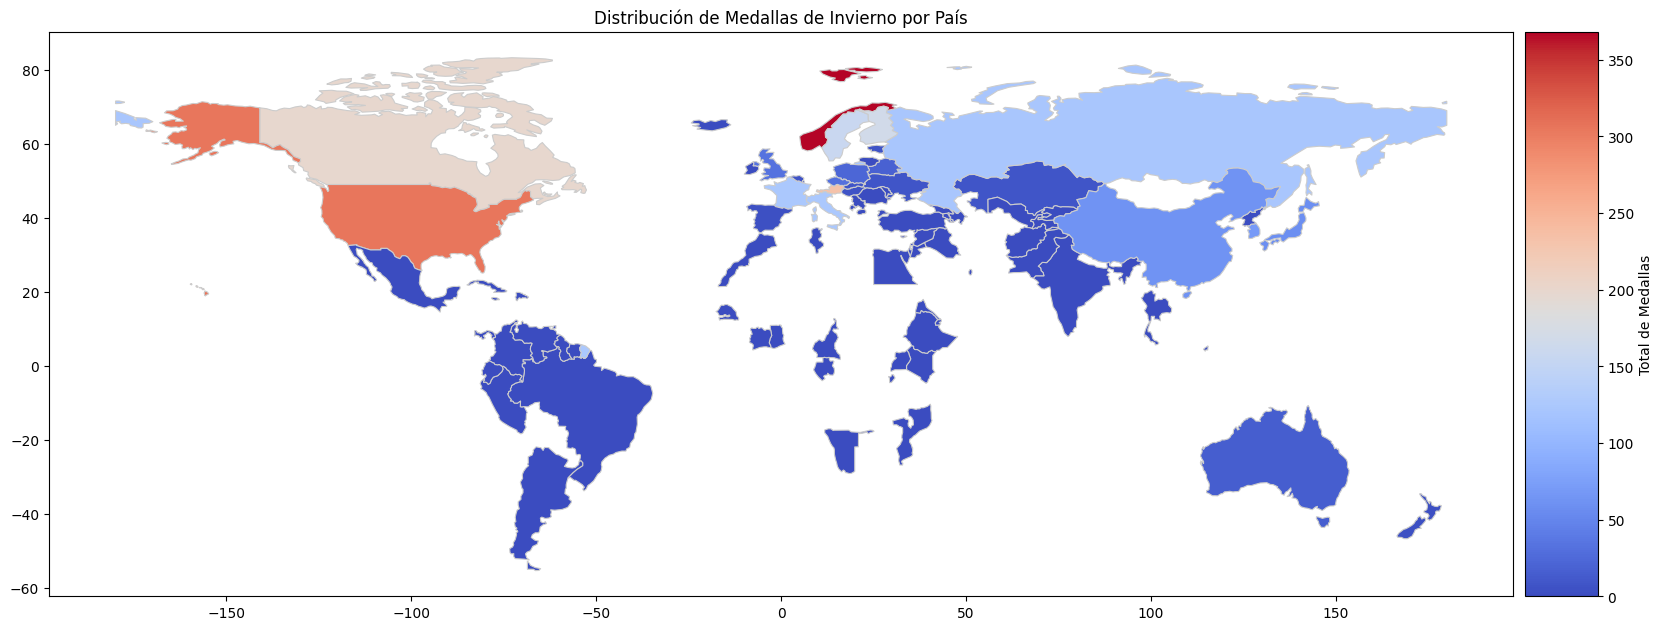

In [12]:
# Visualización geográfica
fig, ax = plt.subplots(figsize=(20, 18))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='winter_total', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Total de Medallas"})
ax.set_title('Distribución de Medallas de Invierno por País')

plt.show()

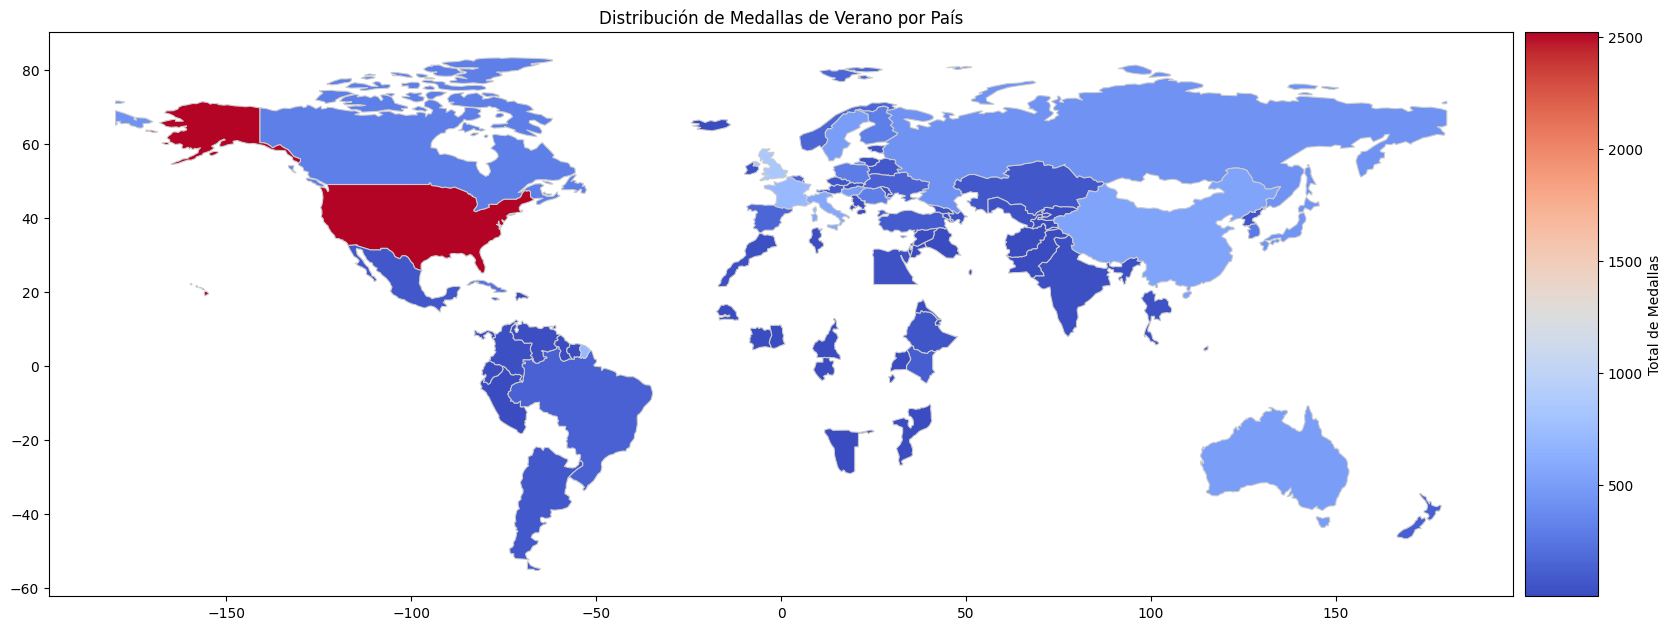

In [13]:
# Visualización geográfica
fig, ax = plt.subplots(figsize=(20, 18))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='summer_total', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True, cax=cax, legend_kwds={'label': "Total de Medallas"})
ax.set_title('Distribución de Medallas de Verano por País')

plt.show()

## Equidad en Deportes de Verano e Invierno

Vamos a ordenar y mostrar graficamente los primeros 10 paises con mayor cantidad de medallas segun la epoca del año.

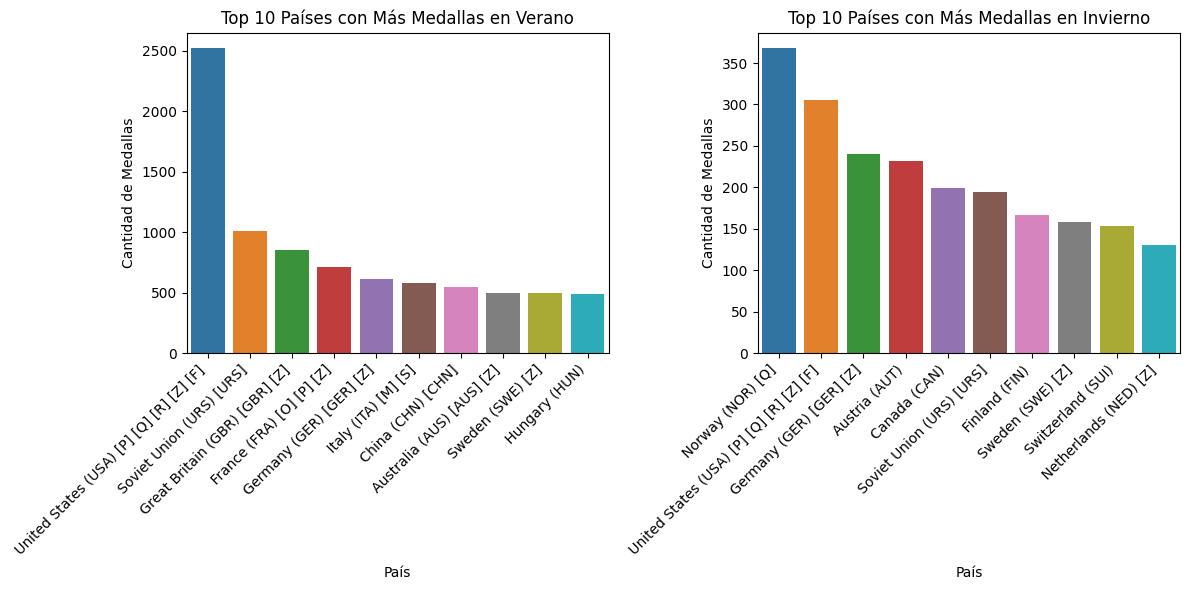

In [16]:
# Filtra las columnas relevantes para verano e invierno
summer_cols = ['s_gold', 's_silver', 's_bronze']
winter_cols = ['w_gold', 'w_silver', 'w_bronze']

# Suma las medallas por tipo para verano e invierno
df['summer_medals'] = df[summer_cols].sum(axis=1)
df['winter_medals'] = df[winter_cols].sum(axis=1)

# Grafica de barras para comparar medallas en verano e invierno
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Team(IOC Code)', y='summer_medals', data=df.sort_values(by='summer_medals', ascending=False).head(10))
plt.title('Top 10 Países con Más Medallas en Verano')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x en 45 grados

plt.subplot(1, 2, 2)
sns.barplot(x='Team(IOC Code)', y='winter_medals', data=df.sort_values(by='winter_medals', ascending=False).head(10))
plt.title('Top 10 Países con Más Medallas en Invierno')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x en 45 grados

plt.tight_layout()
plt.show()

## Comparación de pesos ponderado por medalla

Vamos a presentar 3 modelos de ponderación de medallas:
* Inglés: 5-3-1 puntos por oro-plata-bronce
* Sueco: 3-2-1 puntos por oro-plata-bronce
* Alternativo: 4-2-1 puntos por oro-plata-bronce

In [18]:
# Calculo de la columna de score, teniendo como índice el puntaje por medalla como parametros, según el metodo

def colScore(o,p,b):
	# Calcula los scores por medallas
	df['weight_gold'] = df['total_gold']*o
	df['weight_silver'] = df['total_silver']*p
	df['weight_bronze'] = df['total_bronze']*b
	df['col_score'] = df['weight_gold'] + df['weight_silver'] + df['weight_bronze']
	return

def graphScore ():
	# Grafica de barras para comparar scores según el método
	plt.figure(figsize=(12, 6))

	plt.subplot(1, 2, 1)
	sns.barplot(x='Team(IOC Code)', y='col_score', data=df.sort_values(by='col_score', ascending=False).head(20))
	plt.title('Ranking 20 Países por score')
	plt.xlabel('País')
	plt.ylabel('Total score')
	plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x en 45 grados

	plt.tight_layout()
	plt.show()

Metodo ingles


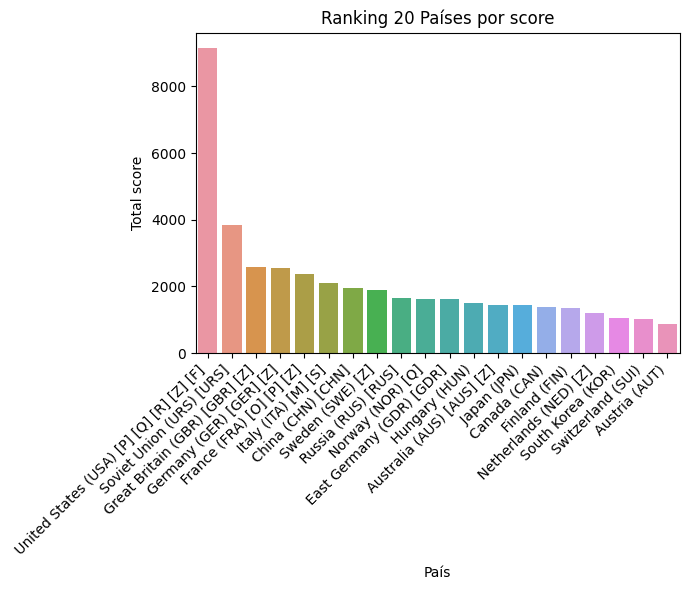

In [19]:
#Inglés: 5-3-1 puntos por oro-plata-bronce
o = 5
p = 3
b = 1
colScore(o,p,b)
print ("Metodo ingles")
graphScore ()

Metodo sueco


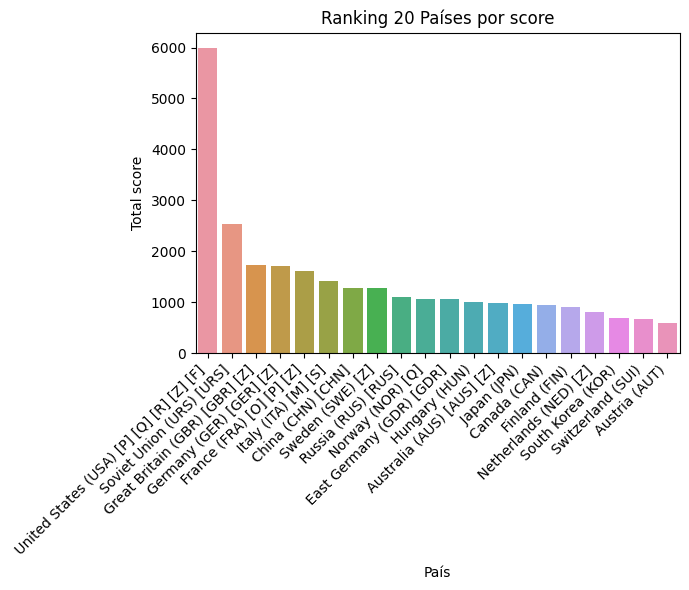

In [20]:
#Sueco: 3-2-1 puntos por oro-plata-bronce
o = 3
p = 2
b = 1
colScore(o,p,b)
print ("Metodo sueco")
graphScore ()

Metodo alternativo


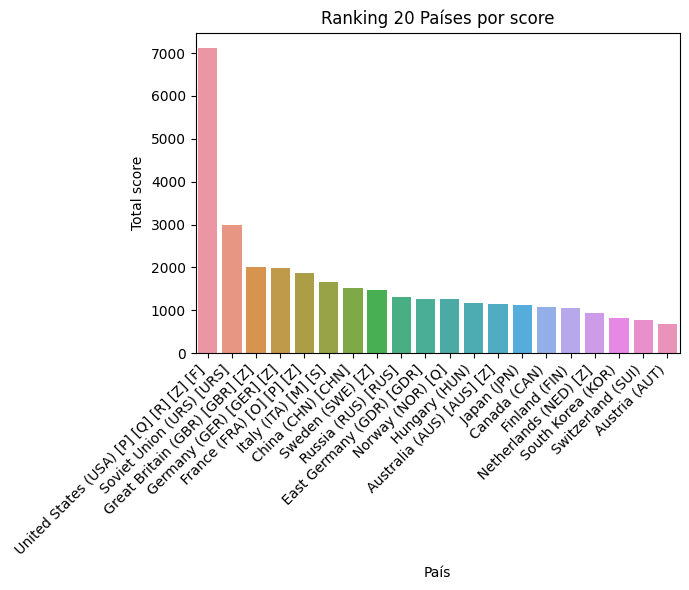

In [21]:
#Alternativa: 4-2-1 puntos por oro-plata-bronce
o = 4
p = 2
b = 1
colScore(o,p,b)
print ("Metodo alternativo")
graphScore ()

___

# 6. Conclusiones y Descubrimientos:

Para comenzar, cabe mencionar la fuerte prevalencia de EEUU y Rusia (y ex URSS) en el conteo de medallas, por lo que entendemos que los datos se encuentran desbalanceados.

Respecto al analisis geografico, pudimos notar que hay ciertas regiones que se ven favorecidas dependiendo del clima de cada región. Por ejemplo, los paises nordicos presentaron una ventaja por sobre EEUU y Canada en los deportes de invierno; mientras que en los deportes de verano EEUU, seguido de los continentes de Europa, Asia y Oceania, se vieron más favorecidos. En el caso de los paises latinoamericanos, se encontro que tenian rendimiento similar en ambos casos.

El scoring viene a proponer una alternativa al método de tabla de posiciones por cantidad de medallas totales y oros primeros. En tal sentido, busca establacer un ranking ponderando las cantidades de cada medalla

Se compararon tres métodos de score. No se observaron diferencias significativas en el ranking obtenido, observándose a EEUU como un outlier en el conjunto de países.

El sistema de rankeo por ponderación de puestos podría mejorarse extendiendo la puntuación del 1er al 8vo puesto

También podría ser conveniente establacer:
* Una clasificación demográfica per cápita: el número de medallas se divide por la población del país.
* Una clasificación demográfica por PBI: el número de medallas se divide por el producto bruto interno (PBI) del país.

O bien incluir recursos destinados al deporte en las distintas naciones

___

# 7. Próximos Pasos y Mejoras:

Creemos conveniente extender el EDA a datos demograficos y socioeconomicos, pero tambien a politicas publicas relacionadas con el deporte y antidoping, asi como tambien relacionar la cantidad de medallas con deportes especificos.

Como posibles pasos siguientes seria analizar cuantas medallas se pierden por juego por dopaje positivo, analizar la correlación entre PBI y los scoring propuestos, analizar la correlación entre el numero total de población de cada pais con el tamaño de su delegación y sus resultados.

Además, se podría incluir un modelo de aprendizaje automatico que, en base a la historia de rendimiento de cada delegación de cada pais, se podria inferir que probabilidad tienen de ganar ciertas medallas segun epoca del año y deporte.